In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [41]:
netflix_title = pd.read_csv('D:/Data Science/Practice with Python/netflix_titles.csv')
netflix_title.head(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


# Data Preparation and Cleaning

In [42]:
netflix_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [43]:
netflix_title.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [44]:
netflix_title.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [45]:
netflix_title.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

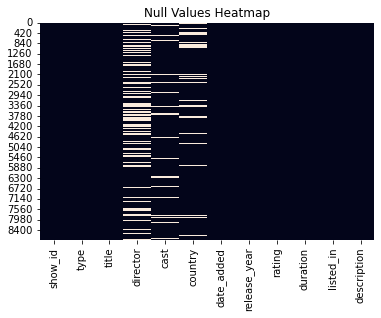

In [46]:
sns.heatmap(netflix_title.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [47]:
netflix_title['director'].fillna('No Director', inplace = True)
netflix_title['cast'].fillna('No Cast', inplace = True)
netflix_title['country'].fillna('Country Unavailable', inplace = True)
netflix_title.dropna(subset=['date_added','rating','duration'], inplace = True)

In [48]:
netflix_title.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

# Splitting the Dataset

In [49]:
netflix_title.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [50]:
netflix_movies = netflix_title[netflix_title['type']== 'Movie'].copy()
netflix_movies.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",Country Unavailable,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",No Cast,Country Unavailable,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",Country Unavailable,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",Country Unavailable,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",Country Unavailable,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...


In [51]:
netflix_shows = netflix_title[netflix_title['type'] == 'TV Show'].copy()
netflix_shows.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",Country Unavailable,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
14,s15,TV Show,Crime Stories: India Detectives,No Director,No Cast,Country Unavailable,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
15,s16,TV Show,Dear White People,No Director,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...


# Data Preparation

In [52]:
netflix_movies.duration = netflix_movies.duration.str.replace(' min','').astype(int)
netflix_shows.rename(columns = {'duration':'seasons'}, inplace = True)
netflix_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace = True)
netflix_shows.seasons = netflix_shows.seasons.str.replace('Seasons','').astype(int)

# Exploratory Analysis and Visualization

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


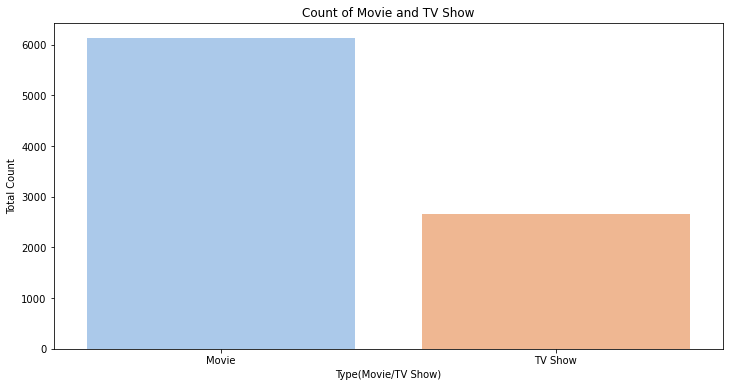

In [53]:
plt.figure(figsize = (12,6))
g=sns.countplot(netflix_title.type, palette = 'pastel')
plt.title('Count of Movie and TV Show')
plt.xlabel('Type(Movie/TV Show)')
plt.ylabel('Total Count')
plt.show()

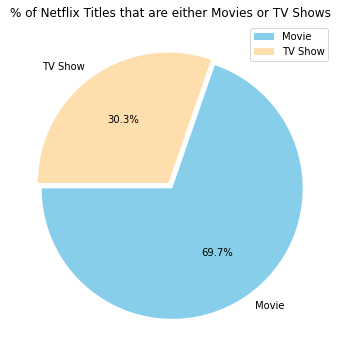

In [54]:
plt.figure(figsize = (12,6))
plt.title('% of Netflix Titles that are either Movies or TV Shows')
g = plt.pie(netflix_title.type.value_counts(), explode = (0.025,0.025), labels=netflix_title.type.value_counts().index, colors = ['skyblue','navajowhite'], autopct = '%1.1f%%', startangle = 180)
plt.legend()
plt.show()

In [55]:
ratings = netflix_title.rating.unique()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


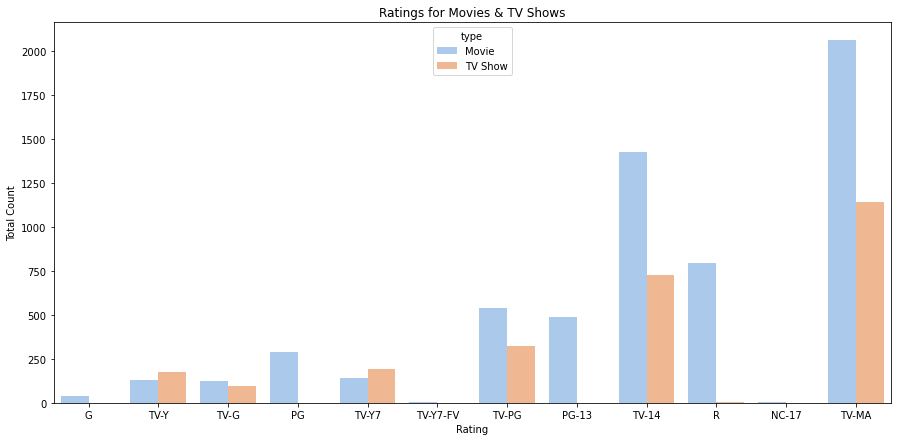

In [56]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(netflix_title.rating, hue=netflix_title.type, order=order, palette="pastel");
plt.title('Ratings for Movies & TV Shows')
plt.xlabel('Rating')
plt.ylabel('Total Count')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp/ipykernel_9592/2192089698.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


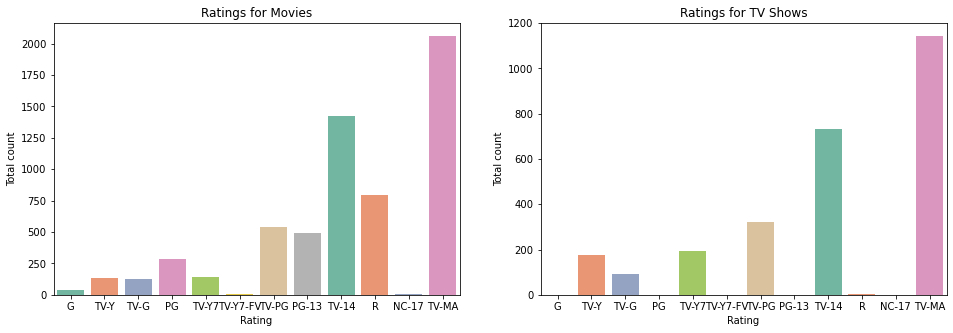

In [57]:
fig,ax=plt.subplots(1,2,figsize=(16,5))
g1 = sns.countplot(netflix_movies.rating, order = order, palette = 'Set2', ax=ax[0])
g1.set_title('Ratings for Movies')
g1.set_xlabel('Rating')
g1.set_ylabel('Total count')
g2 = sns.countplot(netflix_shows.rating, order = order, palette = 'Set2', ax=ax[1])
g2.set_title('Ratings for TV Shows')
g2.set_xlabel('Rating')
g2.set_ylabel('Total count')
fig.show()

In [58]:
netflix_title['year_added']=pd.DatetimeIndex(netflix_title['date_added']).year
netflix_movies['year_added']=pd.DatetimeIndex(netflix_movies['date_added']).year
netflix_shows['year_added']=pd.DatetimeIndex(netflix_shows['date_added']).year
netflix_title['month_added']=pd.DatetimeIndex(netflix_title['date_added']).month
netflix_movies['month_added']=pd.DatetimeIndex(netflix_movies['date_added']).month
netflix_shows['month_added']=pd.DatetimeIndex(netflix_shows['date_added']).month

# Content added each year

In [59]:
netflix_year=netflix_title['year_added'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019,2016
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11
10,2012,3


In [82]:
netflix_year2 = netflix_title[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns = {'index':'year','year_added':'count'})
movie_year = movie_year[movie_year.year !=2021]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns = {'index':'year','year_added':'count'})
show_year = show_year[show_year.year !=2021]

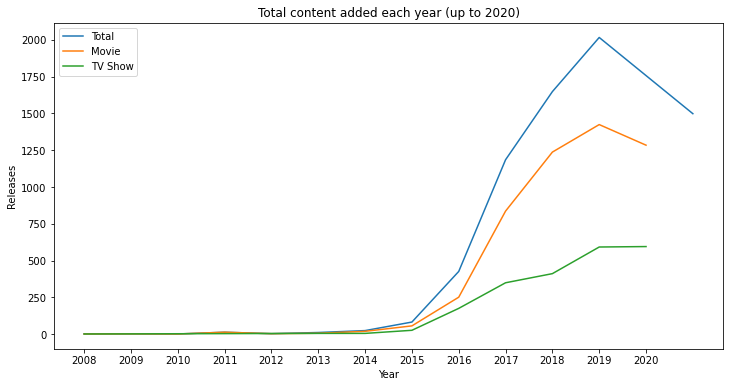

In [83]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=netflix_year, x = 'year', y='count')
sns.lineplot(data=movie_year, x= 'year', y= 'count')
sns.lineplot(data=show_year, x='year', y ='count')
ax.set_xticks(np.arange(2008,2021,1))
plt.title('Total content added each year (up to 2020)')
plt.legend(['Total','Movie','TV Show'])
plt.ylabel('Releases')
plt.xlabel('Year')
plt.show()

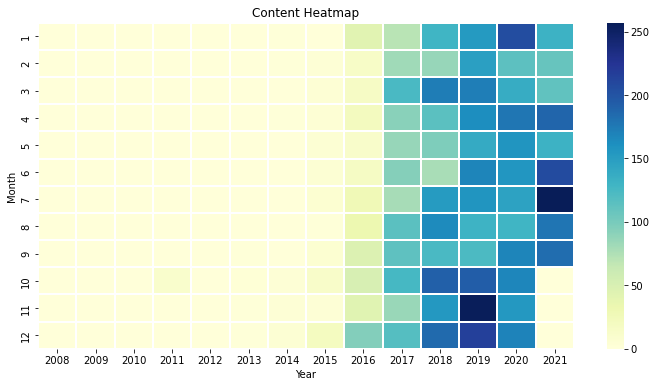

In [62]:
month_year = netflix_title.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(12,6))
sns.heatmap(month_year, linewidths = 0.025, cmap='YlGnBu')
plt.title('Content Heatmap')
plt.ylabel('Month')
plt.xlabel('Year')
plt.show()

# Netflix Film Duration

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp/ipykernel_9592/251248892.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


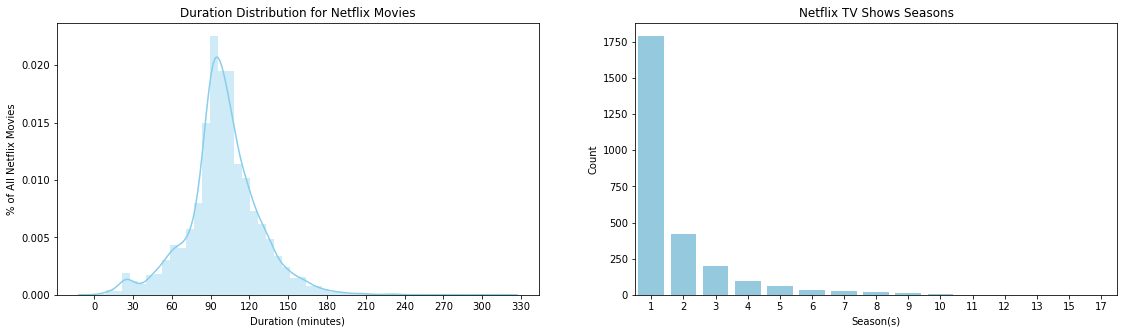

In [63]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.distplot(netflix_movies.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(netflix_shows.seasons, color='skyblue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

# Countries with the most content available

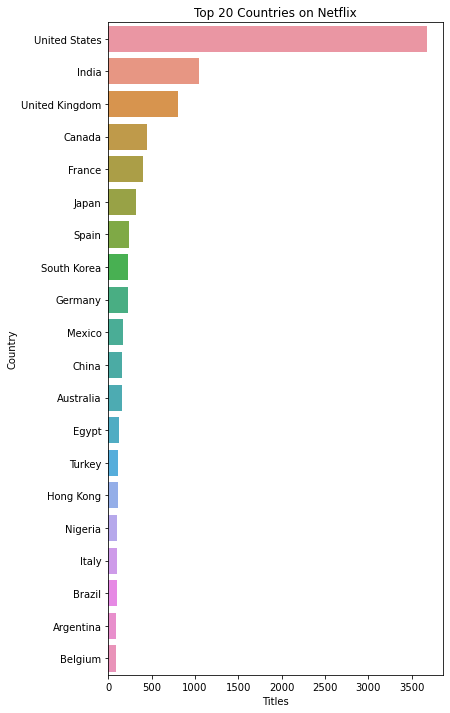

In [64]:
filtered_countries=netflix_title.set_index('title').country.str.split(', ',expand = True).stack().reset_index(level=1, drop = True)
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize = (6,12))
g= sns.countplot(y=filtered_countries, order = filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

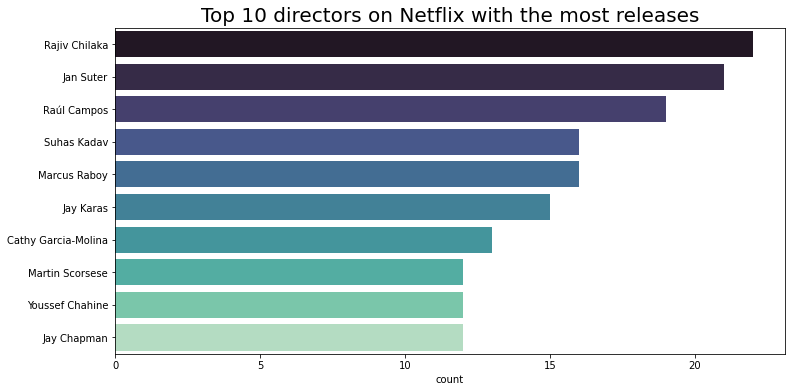

In [65]:
plt.figure(figsize = (12,6))
filtered_directors = netflix_title[netflix_title.director !='No Director'].set_index('title').director.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
sns.countplot(y=filtered_directors, order = filtered_directors.value_counts().index[:10],palette='mako')
plt.title('Top 10 directors on Netflix with the most releases', size = 20)
plt.show()

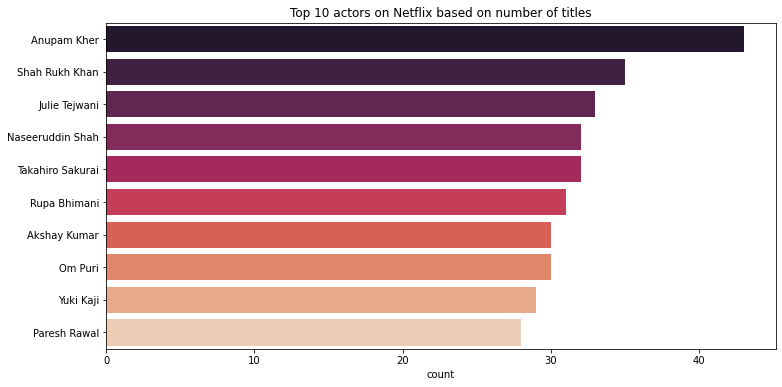

In [66]:
plt.figure(figsize= (12,6))
filtered_casts = netflix_title[netflix_title.cast !='No Cast'].set_index('title').cast.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
sns.countplot(y=filtered_casts, order = filtered_casts.value_counts().index[:10], palette = 'rocket')
plt.title('Top 10 actors on Netflix based on number of titles')
plt.show()

In [80]:
international_movies = netflix_title[netflix_title['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2021]
intmov_year

international_shows = netflix_title[netflix_title['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2021]
intshow_year

,year,count
0,2019,335
1,2020,277
3,2018,214
4,2017,205
5,2016,85
6,2015,3
7,2013,1


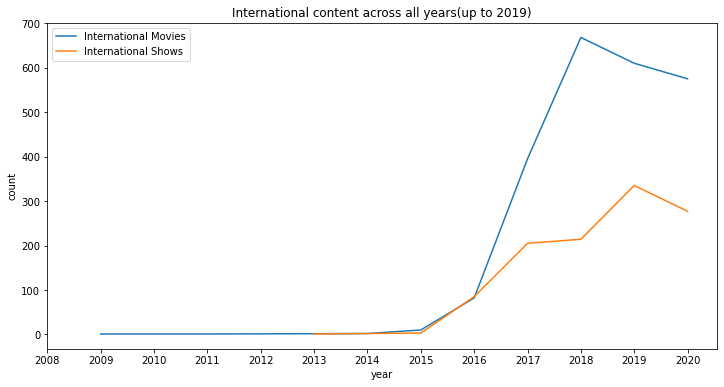

In [81]:
fig,ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=intmov_year, x = 'year', y='count')
sns.lineplot(data=intshow_year, x = 'year', y = 'count')
ax.set(xticks=np.arange(2008,2021,1))
plt.title('International content across all years(up to 2019)')
plt.legend(['International Movies','International Shows'])
plt.show()

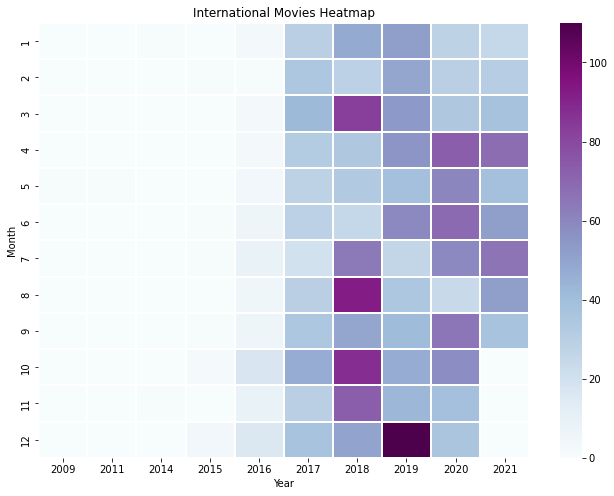

In [85]:
intmov_month_year= international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intmov_month_year, linewidths=0.025, cmap="BuPu")
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

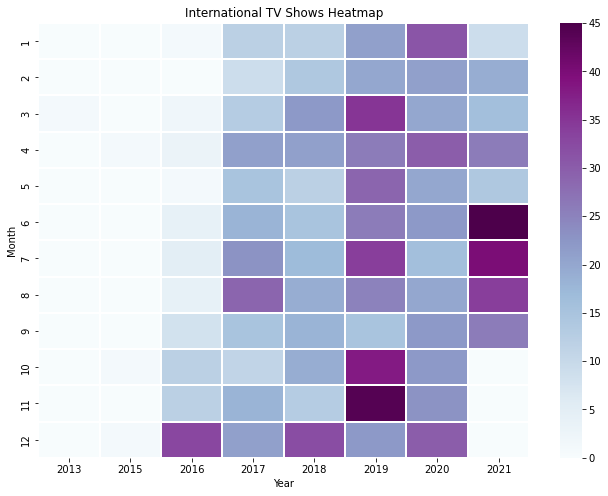

In [86]:
intsho_month_year = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intsho_month_year, linewidths=0.025, cmap="BuPu")
plt.title("International TV Shows Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()